In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/multilingual-customer-support-tickets/ticket_helpdesk_labeled_multi_languages_english_spain_french_german.csv


**LOADING DATASET**

In [2]:
import pandas as pd

# Load the dataset
file_path = '/kaggle/input/multilingual-customer-support-tickets/ticket_helpdesk_labeled_multi_languages_english_spain_french_german.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.info()
df.head()

# Basic statistics of the dataset
print(df.describe())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   queue                200 non-null    object
 1   priority             200 non-null    int64 
 2   software_used        83 non-null     object
 3   hardware_used        66 non-null     object
 4   accounting_category  51 non-null     object
 5   language             200 non-null    object
 6   subject              200 non-null    object
 7   text                 200 non-null    object
dtypes: int64(1), object(7)
memory usage: 12.6+ KB
         priority
count  200.000000
mean     2.195000
std      0.781041
min      1.000000
25%      2.000000
50%      2.000000
75%      3.000000
max      3.000000
queue                    0
priority                 0
software_used          117
hardware_used          134
accounting_category    149
language                 0
subject                  0
text

**LANGUAGE DISTRIBUTION**

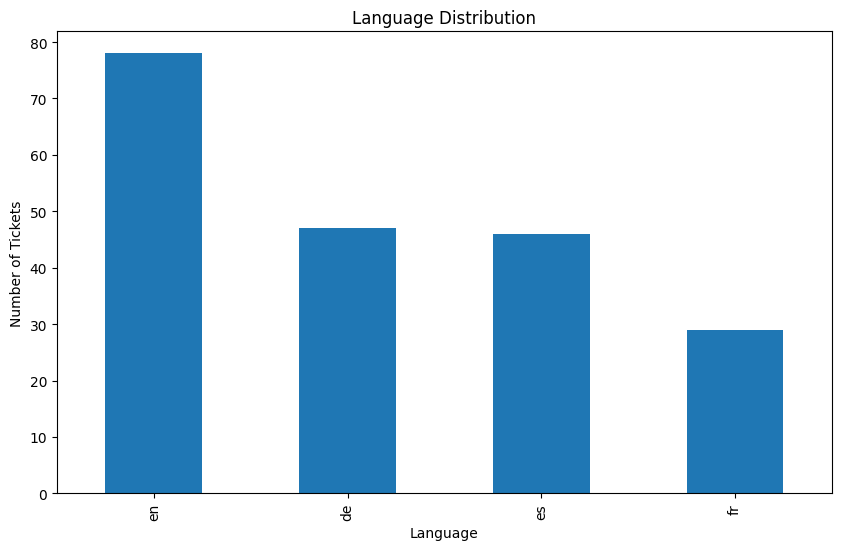

In [3]:
import matplotlib.pyplot as plt

# Count the number of tickets in each language
language_counts = df['language'].value_counts()

# Plot the language distribution
plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar')
plt.title('Language Distribution')
plt.xlabel('Language')
plt.ylabel('Number of Tickets')
plt.show()

**PRIORITY DISTRIBUTION**

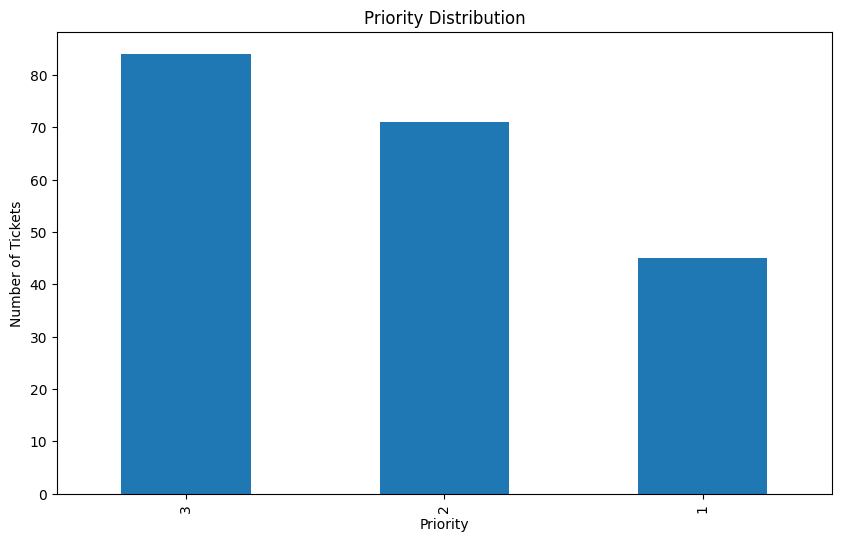

In [4]:
import matplotlib.pyplot as plt

# Count the number of tickets in each priority category
priority_counts = df['priority'].value_counts()

# Plot the priority distribution
plt.figure(figsize=(10, 6))
priority_counts.plot(kind='bar')
plt.title('Priority Distribution')
plt.xlabel('Priority')
plt.ylabel('Number of Tickets')
plt.show()

**QUEUE DISTRIBUTION**

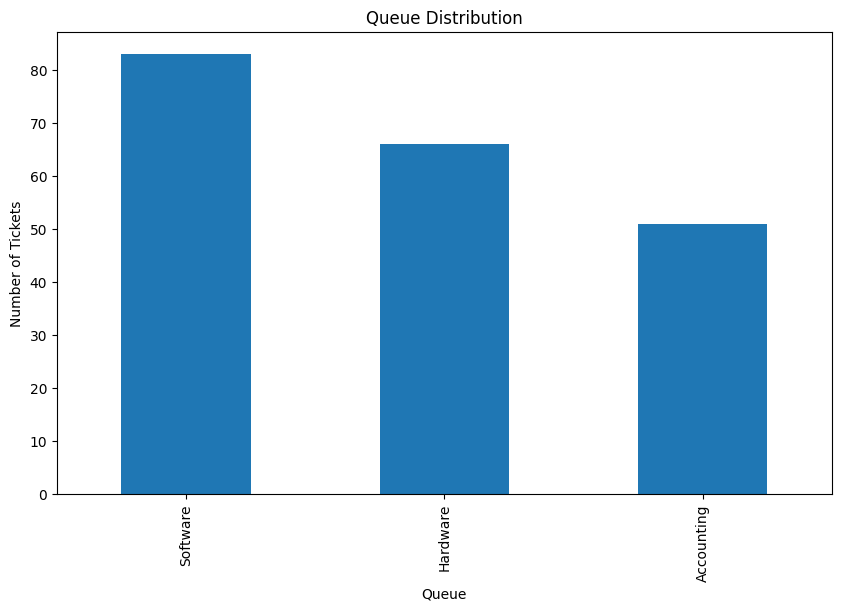

In [5]:
# Count the number of tickets in each queue category
queue_counts = df['queue'].value_counts()

# Plot the queue distribution
plt.figure(figsize=(10, 6))
queue_counts.plot(kind='bar')
plt.title('Queue Distribution')
plt.xlabel('Queue')
plt.ylabel('Number of Tickets')
plt.show()

**TICKET LENGTH ANALYSIS**

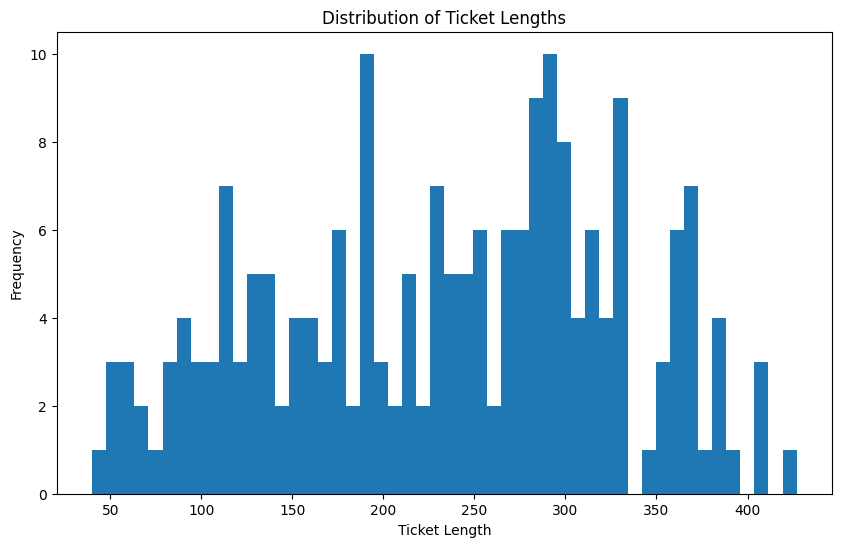

In [6]:
# Add a column for the length of each ticket
df['ticket_length'] = df['text'].apply(len)

# Plot the distribution of ticket lengths
plt.figure(figsize=(10, 6))
df['ticket_length'].plot(kind='hist', bins=50)
plt.title('Distribution of Ticket Lengths')
plt.xlabel('Ticket Length')
plt.ylabel('Frequency')
plt.show()

**LANGUAGE VS PRIORITY ANALYSIS**

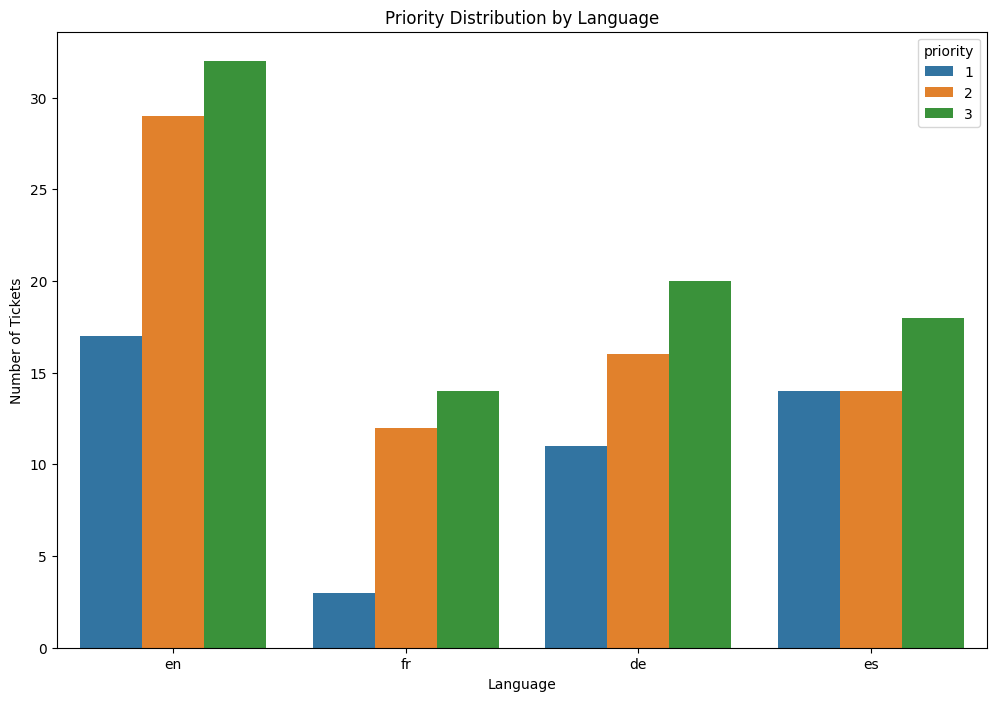

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing 'language' and 'priority' columns
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='language', hue='priority')
plt.title('Priority Distribution by Language')
plt.xlabel('Language')
plt.ylabel('Number of Tickets')
plt.show()


**SENTIMENT ANALYSIS**

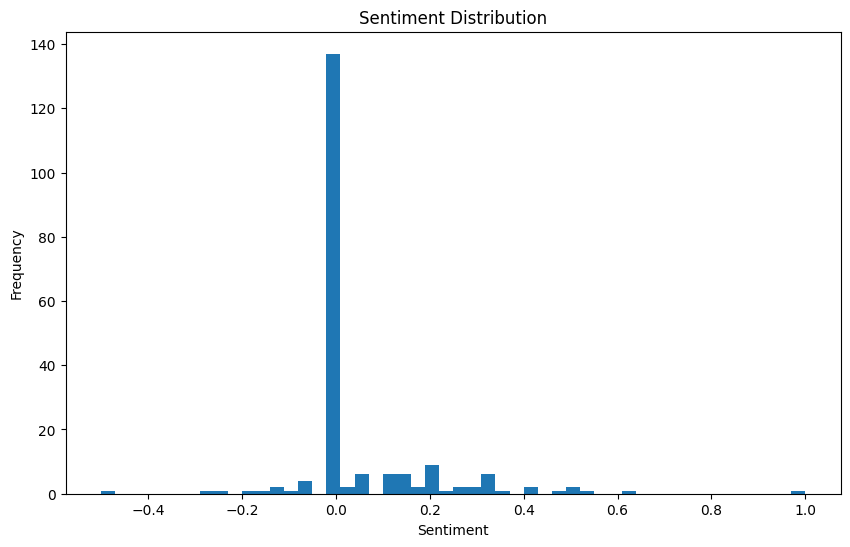

In [8]:
from textblob import TextBlob

# Function to get the sentiment of a ticket
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply the sentiment analysis to the ticket text
df['sentiment'] = df['text'].apply(get_sentiment)

# Plot the sentiment distribution
plt.figure(figsize=(10, 6))
df['sentiment'].plot(kind='hist', bins=50)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()